In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
df = pd.read_csv("Task 3_Final Content Data set.csv")
df.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30


In [3]:
# Convert Datetime column
df['Datetime'] = pd.to_datetime(df['Datetime'], dayfirst=True, errors='coerce')

<ipython-input-3-f321a0b543d2>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Datetime'], dayfirst=True, errors='coerce')


In [4]:
# Top 5 categories
top_categories = df['Category'].value_counts().head(5)

<ipython-input-5-6067e05b317f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


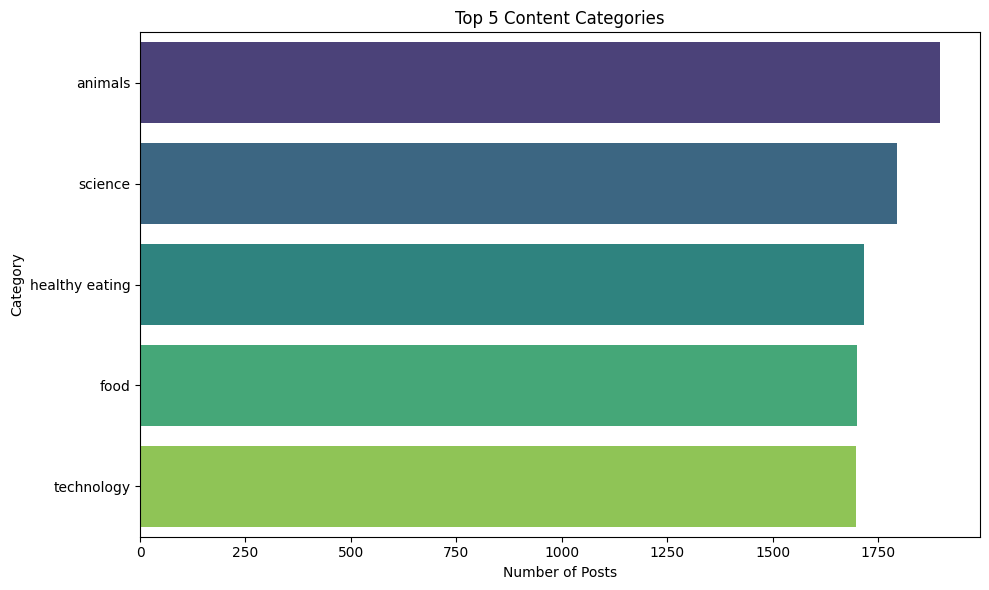

In [5]:
# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 5 Content Categories')
plt.xlabel('Number of Posts')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [6]:
print("Number of unique categories:", df['Category'].nunique())

Number of unique categories: 16


In [7]:
most_popular_category = df['Category'].value_counts().idxmax()
reactions = df[df['Category'] == most_popular_category]['Reaction Type'].count()
print(f"Reactions to the most popular category ('{most_popular_category}'): {reactions}")

Reactions to the most popular category ('animals'): 1897


In [8]:
df['Month-Year'] = df['Datetime'].dt.to_period('M')
most_posts_month = df['Month-Year'].value_counts().idxmax().strftime('%B %Y')
most_posts_count = df['Month-Year'].value_counts().max()

print(f"Month with the most posts: {most_posts_month} ({most_posts_count} posts)")


Month with the most posts: May 2021 (2138 posts)


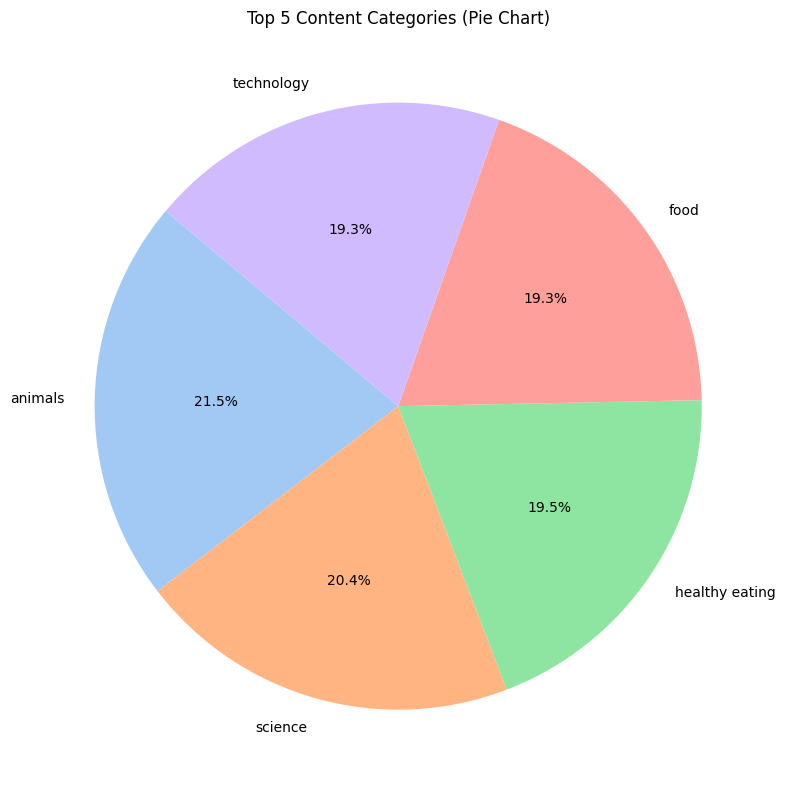

In [9]:
# Pie chart for top 5 content categories
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:5]
plt.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Top 5 Content Categories (Pie Chart)')
plt.axis('equal')
plt.tight_layout()
plt.show()
